# WeatherPy
----

##### Key Observations
1. There are more cities in the Northern Hemisphere (Antartica occupies a large portion of the southern hemisphere
2. There is a definite correlation between maximum temperature and distance to the equator
3. Humidy, Wind Speed and Cloudiness do not appear to have the same correlation with latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import requests
import json
import os

from matplotlib.offsetbox import AnchoredText

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"
#output_data_file = "citiesA.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
This is achieved using citipy to find the name of the nearest city based on latitude and longitude.  First a set of randm latitude and longitude values are generated.  Looping through those values identifies the nearest city using citipy and if the city is not already in the list of cities it is added. The result is a list of random city names. 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000,  high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)  #cities is a list of city names

# Print the city count to confirm sufficient count
number_of_cities = len(cities)
print(f"This program will look at {number_of_cities} cities")

This program will look at 779 cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# set up dataframe column names
column_names = ['City','Cloudiness','Country',
                'Date','Humidity','Lat','Lng',
                'Max Temp','Wind Speed']

# Create an empty list to populate with weather data
weather = []

# Print a banner
print('Beginning Data Retrieval')
print("------------------------------")

# Loop over the list of cities and request data from openweather
for i in range(0, len(cities)):
    # Set up the url for the city to query
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[i]+"&units=imperial&appid=283a9319d8bc008a581bb0b88d702293"
    #print(url)
    
    try: 
        # Make the request call and jsonify it all in one step
        response = requests.get(url).json()
        # Print a progress report to the screen
        print("Processing Record \033[36m {0}\033[0m of Set \033[36m {1} \033[0m | {2}".format(i, number_of_cities, cities[i]))
        # append the call data to the weather list
        weather.append([response['name'], response['clouds']['all'], 
                    response['sys']['country'], 
                    response['dt'], response['main']['humidity'], response['coord']['lat'], 
                    response['coord']['lon'], response['main']['temp_max'], 
                    response['wind']['speed']])
    except:
        # If the city is not found just skip it and process the next city 
        print('City \033[1m not \033[0m found. Skipping...')

# Create a dataframe with the weather data
df = pd.DataFrame(weather, columns=column_names)
df


Beginning Data Retrieval
------------------------------
Processing Record  0 of Set  779  | cabo san lucas
Processing Record  1 of Set  779  | dover
Processing Record  2 of Set  779  | iqaluit
Processing Record  3 of Set  779  | norman wells
Processing Record  4 of Set  779  | san quintin
Processing Record  5 of Set  779  | port alfred
Processing Record  6 of Set  779  | mataura
Processing Record  7 of Set  779  | hami
Processing Record  8 of Set  779  | ushuaia
Processing Record  9 of Set  779  | castro
Processing Record  10 of Set  779  | margate
Processing Record  11 of Set  779  | coihaique
Processing Record  12 of Set  779  | fairbanks
Processing Record  13 of Set  779  | atuona
Processing Record  14 of Set  779  | constitucion
Processing Record  15 of Set  779  | grand river south east
City  not  found. Skipping...
Processing Record  16 of Set  779  | rikitea
Processing Record  17 of Set  779  | kapaa
Processing Record  18 of Set  779  | zilupe
Processing Record  19 of Set  779  

Processing Record  119 of Set  779  | bethel
Processing Record  120 of Set  779  | camacha
Processing Record  121 of Set  779  | sangre grande
Processing Record  122 of Set  779  | smithers
Processing Record  123 of Set  779  | osinovo
Processing Record  124 of Set  779  | high prairie
Processing Record  125 of Set  779  | champerico
Processing Record  126 of Set  779  | inta
Processing Record  127 of Set  779  | aguimes
Processing Record  128 of Set  779  | provideniya
Processing Record  129 of Set  779  | altay
Processing Record  130 of Set  779  | menongue
Processing Record  131 of Set  779  | yulara
Processing Record  132 of Set  779  | qaqortoq
Processing Record  133 of Set  779  | weiser
Processing Record  134 of Set  779  | puerto madero
Processing Record  135 of Set  779  | palabuhanratu
City  not  found. Skipping...
Processing Record  136 of Set  779  | zhigansk
Processing Record  137 of Set  779  | hualmay
Processing Record  138 of Set  779  | murgab
Processing Record  139 of

Processing Record  239 of Set  779  | nikolsk
Processing Record  240 of Set  779  | svetlogorsk
Processing Record  241 of Set  779  | nang rong
Processing Record  242 of Set  779  | goderich
Processing Record  243 of Set  779  | chokurdakh
Processing Record  244 of Set  779  | bolobo
Processing Record  245 of Set  779  | kavieng
Processing Record  246 of Set  779  | tortosa
Processing Record  247 of Set  779  | ankang
Processing Record  248 of Set  779  | sibu
Processing Record  249 of Set  779  | pimampiro
Processing Record  250 of Set  779  | cidreira
Processing Record  251 of Set  779  | hithadhoo
Processing Record  252 of Set  779  | shache
Processing Record  253 of Set  779  | praia da vitoria
Processing Record  254 of Set  779  | hilo
Processing Record  255 of Set  779  | uhlove
Processing Record  256 of Set  779  | upata
Processing Record  257 of Set  779  | ancud
Processing Record  258 of Set  779  | poum
Processing Record  259 of Set  779  | gravelbourg
Processing Record  260 

Processing Record  363 of Set  779  | eldorado
Processing Record  364 of Set  779  | chuy
Processing Record  365 of Set  779  | antalaha
Processing Record  366 of Set  779  | cockburn town
Processing Record  367 of Set  779  | erenhot
Processing Record  368 of Set  779  | fuyang
Processing Record  369 of Set  779  | vieux-habitants
Processing Record  370 of Set  779  | port lincoln
Processing Record  371 of Set  779  | camana
Processing Record  372 of Set  779  | banda aceh
Processing Record  373 of Set  779  | kavaratti
Processing Record  374 of Set  779  | natal
Processing Record  375 of Set  779  | paragominas
Processing Record  376 of Set  779  | magadi
Processing Record  377 of Set  779  | gayeri
Processing Record  378 of Set  779  | krasnoselkup
Processing Record  379 of Set  779  | chabahar
Processing Record  380 of Set  779  | avera
Processing Record  381 of Set  779  | warri
Processing Record  382 of Set  779  | nome
Processing Record  383 of Set  779  | seguela
Processing Rec

Processing Record  486 of Set  779  | plattsburgh
Processing Record  487 of Set  779  | sika
Processing Record  488 of Set  779  | kenai
Processing Record  489 of Set  779  | khonuu
City  not  found. Skipping...
Processing Record  490 of Set  779  | yumen
Processing Record  491 of Set  779  | linxia
Processing Record  492 of Set  779  | canon city
Processing Record  493 of Set  779  | hofn
Processing Record  494 of Set  779  | ngunguru
Processing Record  495 of Set  779  | port augusta
Processing Record  496 of Set  779  | tuy hoa
Processing Record  497 of Set  779  | sokoni
Processing Record  498 of Set  779  | longyan
Processing Record  499 of Set  779  | barabai
Processing Record  500 of Set  779  | cabinda
Processing Record  501 of Set  779  | vanavara
Processing Record  502 of Set  779  | kalmunai
Processing Record  503 of Set  779  | canyon
Processing Record  504 of Set  779  | jawhar
Processing Record  505 of Set  779  | pio xii
Processing Record  506 of Set  779  | college
Proc

Processing Record  607 of Set  779  | coquimbo
Processing Record  608 of Set  779  | pedasi
Processing Record  609 of Set  779  | pamplona
Processing Record  610 of Set  779  | marsh harbour
Processing Record  611 of Set  779  | chernyshevskiy
Processing Record  612 of Set  779  | upington
Processing Record  613 of Set  779  | egvekinot
Processing Record  614 of Set  779  | rockland
Processing Record  615 of Set  779  | barbastro
Processing Record  616 of Set  779  | astana
Processing Record  617 of Set  779  | wanxian
Processing Record  618 of Set  779  | tual
Processing Record  619 of Set  779  | zaozerne
Processing Record  620 of Set  779  | havelock
Processing Record  621 of Set  779  | bac giang
Processing Record  622 of Set  779  | urdzhar
City  not  found. Skipping...
Processing Record  623 of Set  779  | sungairaya
Processing Record  624 of Set  779  | ganzhou
Processing Record  625 of Set  779  | bolu
Processing Record  626 of Set  779  | kigoma
Processing Record  627 of Set  

Processing Record  730 of Set  779  | acarau
Processing Record  731 of Set  779  | nouakchott
Processing Record  732 of Set  779  | fort saint john
City  not  found. Skipping...
Processing Record  733 of Set  779  | mahon
Processing Record  734 of Set  779  | nishihara
Processing Record  735 of Set  779  | pacific grove
Processing Record  736 of Set  779  | hohhot
Processing Record  737 of Set  779  | zhitikara
City  not  found. Skipping...
Processing Record  738 of Set  779  | ampanihy
Processing Record  739 of Set  779  | parksville
Processing Record  740 of Set  779  | zhangye
Processing Record  741 of Set  779  | hanmer springs
Processing Record  742 of Set  779  | emerald
Processing Record  743 of Set  779  | kaeo
Processing Record  744 of Set  779  | thibodaux
Processing Record  745 of Set  779  | newport
Processing Record  746 of Set  779  | yanam
Processing Record  747 of Set  779  | canmore
Processing Record  748 of Set  779  | kichera
Processing Record  749 of Set  779  | bag

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,5,MX,1584216334,54,22.89,-109.91,81.00,13.87
1,Dover,1,US,1584216302,24,39.16,-75.52,57.99,8.05
2,Iqaluit,5,CA,1584216321,62,63.75,-68.51,-16.01,16.11
3,Norman Wells,75,CA,1584216391,66,65.28,-126.83,14.00,5.82
4,San Quintín,43,MX,1584216261,67,30.48,-115.95,62.91,12.06
...,...,...,...,...,...,...,...,...,...
716,Velyka Pysarivka,100,UA,1584216528,77,50.43,35.48,33.03,20.33
717,Boyolangu,86,ID,1584216528,92,-8.12,111.89,73.71,1.14
718,Takoradze,100,GH,1584216528,88,4.88,-1.76,79.47,2.82
719,Hambantota,20,LK,1584216290,78,6.12,81.12,78.93,16.26


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save the city data into a CSV file
df.to_csv (output_data_file, header=True, index = False)

# display the dataframe
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,5,MX,1584216334,54,22.89,-109.91,81.00,13.87
1,Dover,1,US,1584216302,24,39.16,-75.52,57.99,8.05
2,Iqaluit,5,CA,1584216321,62,63.75,-68.51,-16.01,16.11
3,Norman Wells,75,CA,1584216391,66,65.28,-126.83,14.00,5.82
4,San Quintín,43,MX,1584216261,67,30.48,-115.95,62.91,12.06
...,...,...,...,...,...,...,...,...,...
716,Velyka Pysarivka,100,UA,1584216528,77,50.43,35.48,33.03,20.33
717,Boyolangu,86,ID,1584216528,92,-8.12,111.89,73.71,1.14
718,Takoradze,100,GH,1584216528,88,4.88,-1.76,79.47,2.82
719,Hambantota,20,LK,1584216290,78,6.12,81.12,78.93,16.26


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
# A function to correctly label plots

def label_plot(plt,plot_title, x_axis, y_axis):
    plt.set_title(plot_title)
    plt.set_xlabel(x_axis)
    plt.set_ylabel(y_axis)
    

#### Latitude vs. Temperature Plot

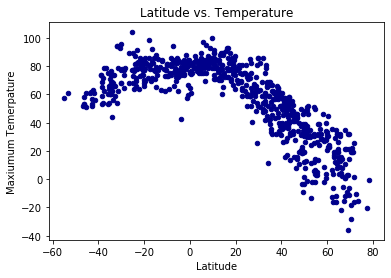

In [6]:
ax1 = df.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Temperature', "Latitude", "Maxiumum Temerpature")
plt.savefig('./output_data/LatVTemp.png')
plt.show()

#### Latitude vs Temperature: Observation
Temperatures tend to peak at distance closer to the equator (increasing as it approaches latitude 0) then falls off by distance either to the north or south, with much cooler temperatures observed in the Northern Hemisphere ciites (of course this could be due to the fact there are more cities in the Northern Hemisphere). 

#### Latitude vs. Humidity Plot

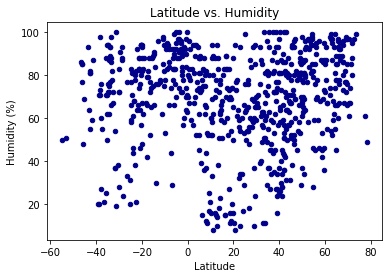

In [7]:
ax1 = df.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Humidity', "Latitude", "Humidity (%)")
plt.savefig('./output_data/LatVHumid.png')
plt.show()

#### Latitude vs Humidity: Observation
Humidity appears (for this data set) not to vary greatly by latitude, with the exceptions being north and south extremes. 

#### Latitude vs. Cloudiness Plot

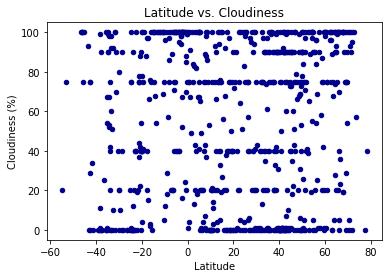

In [8]:
ax1 = df.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Cloudiness', "Latitude", "Cloudiness (%)")
plt.savefig('./output_data/LatVCloud.png')
plt.show()

#### Latitude vs Cloudiness: Observation
There appears to be no strong correlation between latitude and cloudiness. The interesting grid like structure could be because wind speeds are rounded up or truncated to the nearest _X_ MPH

#### Latitude vs. Wind Speed Plot

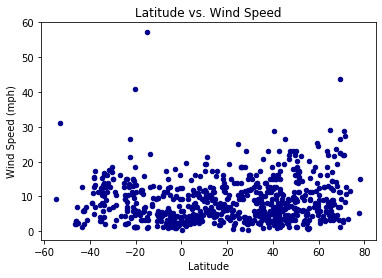

In [9]:
ax1 = df.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Wind Speed', "Latitude", "Wind Speed (mph)")
plt.savefig('./output_data/LatVWind.png')
plt.show()

#### Latitude vs Windspeed: Observation
Again there is no real visible correlation between latitude and windspeed, althought the highest winds are in the Nothern Hemisphere - this could be due to the fact there are more cities. The outliers at roughly -40, 20 and 40 are interesting and indictate very fast winds at these latitudes. 

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn
# Use sci pi to the the pearson r measure of correlation (r value)

def plot_linear_regression(x_values, y_values, x_label, y_label):    

    # Do a line regression on x and y values to calculate values for the line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Longer print message - can uncomment if would prefer longer message
#     print('The correlation between ' + x_label + 
#       '\033[1m and \033[0m' +
#       'the ' + y_label +
#       '\033[1m is \033[0m' + 
#        f'\033[36m {rvalue:2.2f} \033[0m')

    fig, ax = plt.subplots()

    r_squared = rvalue * rvalue;
    
    print('  The r-value'   + '\033[1m is \033[0m' + f'\033[36m {rvalue:2.6f} \033[0m')
    print('The r-squared' + '\033[1m is \033[0m' + f'\033[36m {r_squared:2.6f} \033[0m')

    # Create a scatter plot of weight versus average tumor volume
    ax.scatter(x_values,y_values)
    
    # Add a red line to indicate the correlation
    ax.plot(x_values,regress_values,"r-")
    
    # Create labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label+" Versus "+ y_label)

    # Annotate with the line equation
    Afont = {'family': 'serif',
             'backgroundcolor': 'white',
             'color':  'red',
             'weight': 'normal',
             'size': 14,
    }
        
    line_eq = 'y= '+ str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #plt.annotate(line_eq,(min(x_values), 1.75*(max(y_values)/2)),fontsize=12,color="red")
    at = AnchoredText(line_eq,
                  frameon=True, prop=Afont,
                  loc='upper right',
                  bbox_to_anchor=(1.3, 1.),
                  bbox_transform=ax.transAxes
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    # Show the plot
    ax

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] >= 0]    #greater than or equal to 0 degrees latitude
southern_df = df[df['Lat'] <  0]   #less than 0 degrees latitude

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

  The r-value is  -0.880725 
The r-squared is  0.775676 


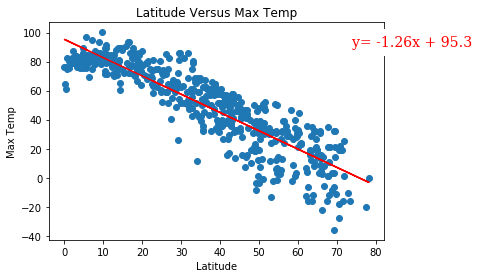

In [12]:
# Call the linear regression function
plot_linear_regression(northern_df['Lat'], northern_df['Max Temp'], "Latitude", "Max Temp")

##### Northern Hemisphere - Max Temp vs. Latitude Linear Regression: Obervation
There is a strong negative correlation between max temperatures and latitude.  As we move northward away from the equator (latitude 0) maximum temperatures delcine.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

  The r-value is  0.490365 
The r-squared is  0.240458 


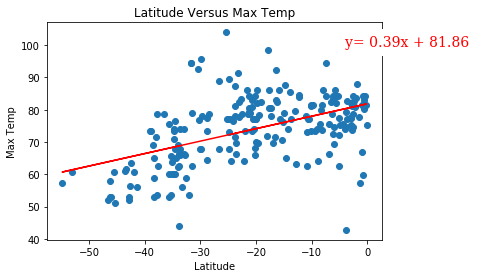

In [13]:
plot_linear_regression(southern_df['Lat'], southern_df['Max Temp'], "Latitude",  "Max Temp")

##### Southern Hemisphere - Max Temp vs. Latitude Observation
There is a very weak positive correlation between max temperatures and latitude.  As we move northward toward from the equator (latitude 0) maximum temperatures do increase but the r-squared value is less than 1.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

  The r-value is  0.257898 
The r-squared is  0.066511 


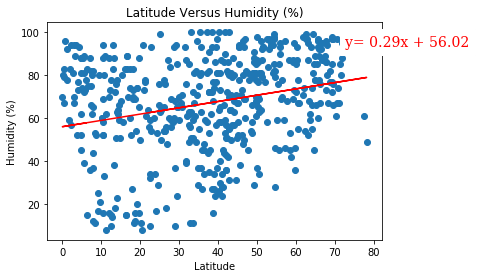

In [14]:
plot_linear_regression(northern_df['Lat'], northern_df['Humidity'], "Latitude",  "Humidity (%)")

#####  Northern Hemisphere - Humidity (%) vs. Latitude Observation

There is no correlation between the percentage humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

  The r-value is  0.292430 
The r-squared is  0.085516 


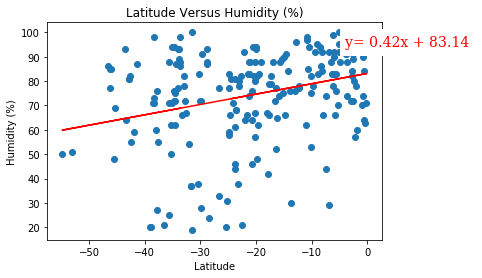

In [15]:
plot_linear_regression(southern_df['Lat'], southern_df['Humidity'], "Latitude", "Humidity (%)")

#####  Southern Hemisphere - Humidity (%) vs. Latitude Observation
There is no correlation between the percentage humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

  The r-value is  0.153331 
The r-squared is  0.023510 


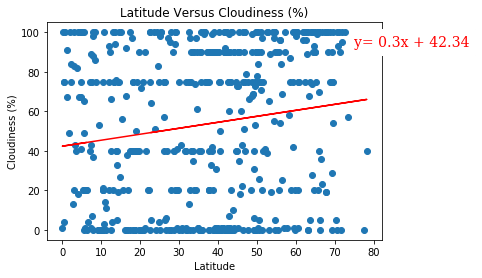

In [16]:
plot_linear_regression(northern_df['Lat'], northern_df['Cloudiness'], "Latitude", "Cloudiness (%)")

#####  Northern Hemisphere - Cloudiness vs. Latitude Observation
There is no correlation between the percentage cloudiness and latitude in the northern hemisphere.  The grid like structure of the scatter plot indicates there might be some binning or rounding of wind speeds in this data set.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

  The r-value is  0.319917 
The r-squared is  0.102347 


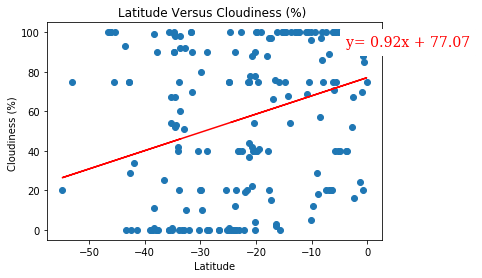

In [17]:
plot_linear_regression(southern_df['Lat'], southern_df['Cloudiness'], "Latitude", "Cloudiness (%) ")

#####  Southern Hemisphere - Cloudiness vs. Latitude Observation
There is no correlation between the percentage humidity and latitude in the southern hemisphere, although there do seem to be a higher cluster of clouds closer to the equator, and very sparse cloud over as we move south from the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

  The r-value is  0.188076 
The r-squared is  0.035373 


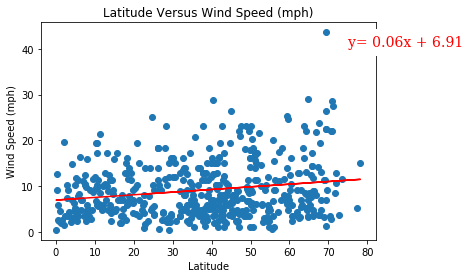

In [18]:
plot_linear_regression(northern_df['Lat'], northern_df['Wind Speed'], "Latitude" , "Wind Speed (mph)")

#####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Observation
There is no correlation between the wind speed and latitude in the northern hemisphere.  Again ther are some outliers at 20 and 40 degree latitude lines indicating faster winds. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

  The r-value is  -0.175843 
The r-squared is  0.030921 


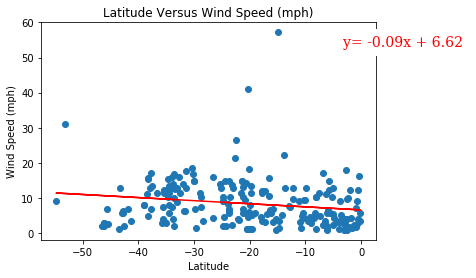

In [19]:
plot_linear_regression( southern_df['Lat'], southern_df['Wind Speed'], "Latitude", "Wind Speed (mph)")

#####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Observation
There is no correlation between the wind speed  and latitude in the southern hemisphere.  A single datapoint shows faster winds at -40. 

# End of Notebook 